In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from statsmodels.tsa.stattools import adfuller, coint
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('df.csv')
df.head()
df['Date']=pd.to_datetime(df['Date'], errors='coerce')

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          731 non-null    datetime64[ns]
 1   Open          731 non-null    float64       
 2   High          731 non-null    float64       
 3   Low           731 non-null    float64       
 4   Close         731 non-null    float64       
 5   Adj Close     731 non-null    float64       
 6   Volume        731 non-null    int64         
 7   polarity      731 non-null    float64       
 8   subjectivity  731 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 51.5 KB
None
                      Date          Open          High           Low  \
count                  731    731.000000    731.000000    731.000000   
mean   2018-06-25 00:00:00   6719.764508   6920.577414   6505.062473   
min    2017-06-25 00:00:00   1932.619995   2058.770020 

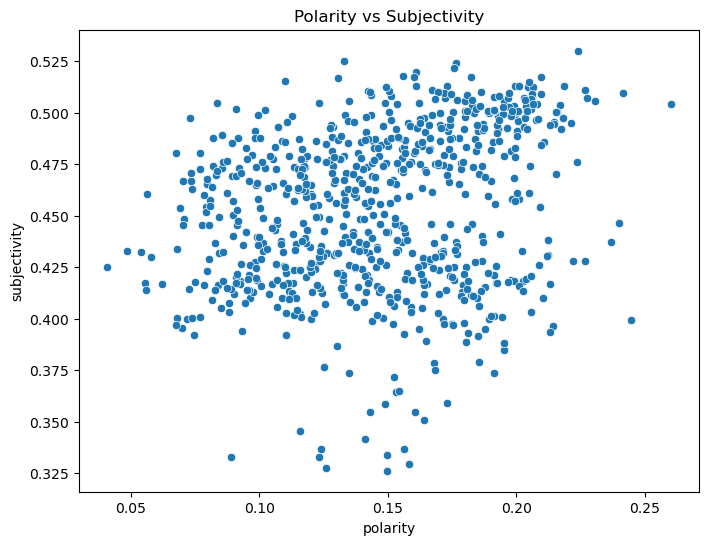

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='polarity', y='subjectivity')
plt.title('Polarity vs Subjectivity')
plt.show()

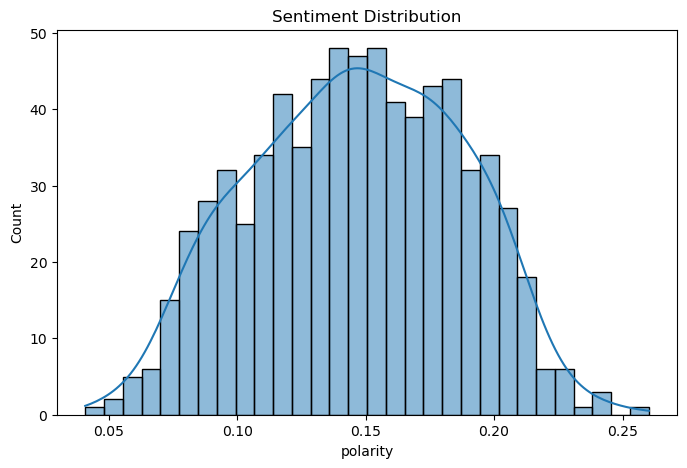

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()

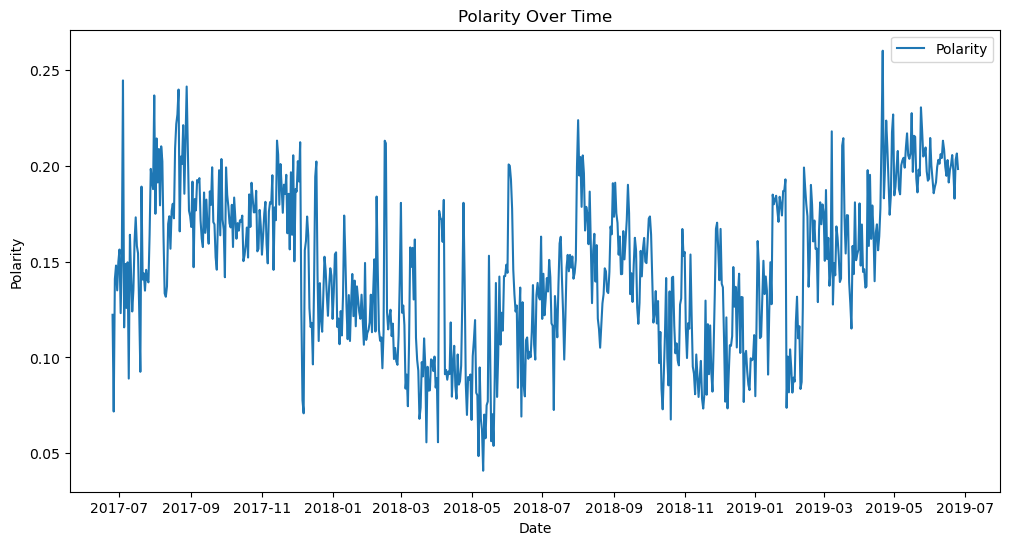

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['polarity'], label='Polarity')
plt.title('Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(False)
plt.show()

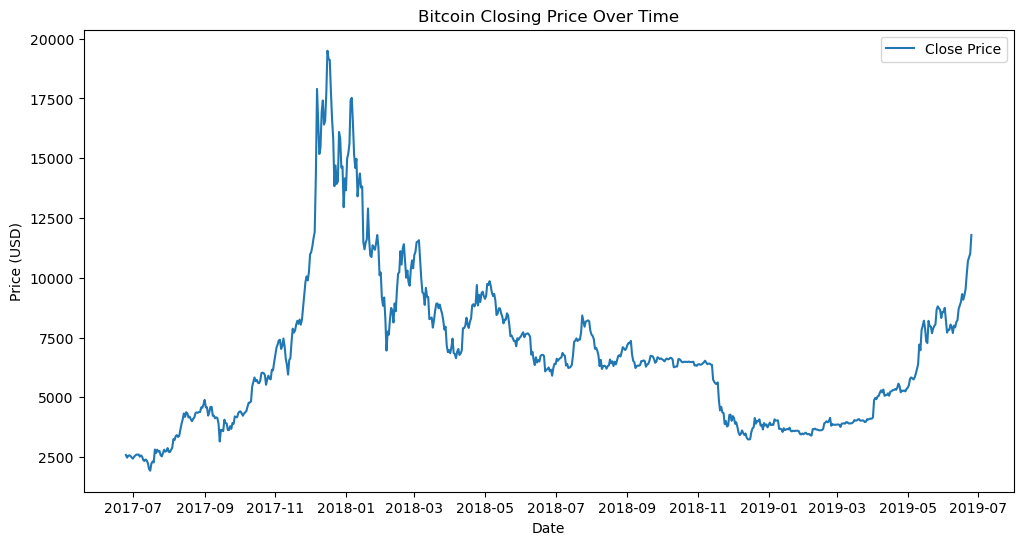

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # One tick every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(False)
plt.show()

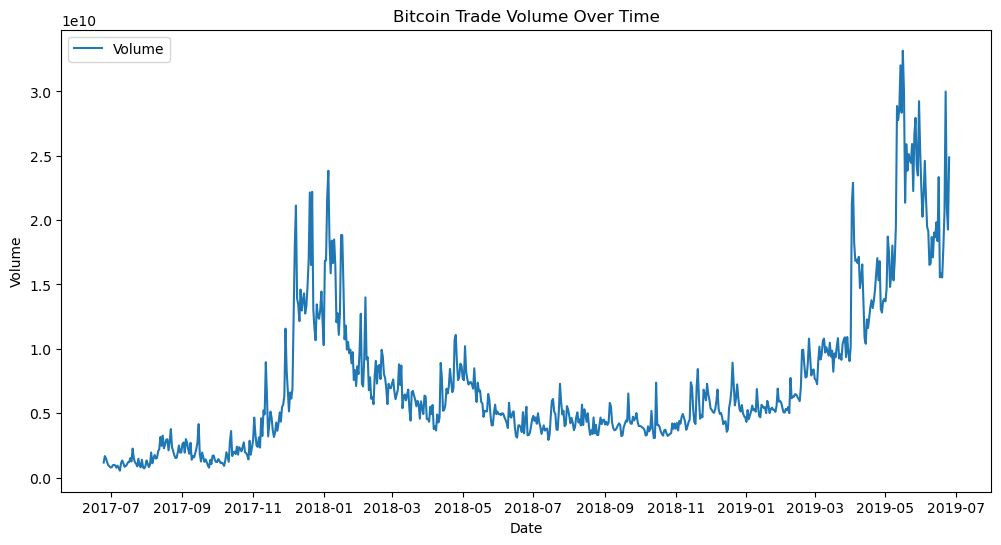

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Bitcoin Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # One tick every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(False)
plt.show()

In [9]:
def check_stationarity(series, significance_level=0.05):
    result = adfuller(series.dropna())
    p_value = result[1]
    if p_value < significance_level:
        print(f"Series is stationary (p-value: {p_value:.4f})")
        return True
    else:
        print(f"Series is non-stationary (p-value: {p_value:.4f})")
        return False
d = 0
df['Close_Difff'] = df['Close']
while not check_stationarity(df['Close_Difff']):
    d += 1
    df['Close_Difff'] = df['Close_Difff'].diff().dropna()
    print(f"Differenced {d} time(s)")
print(f"Total differences needed: {d}")

Series is non-stationary (p-value: 0.1636)
Differenced 1 time(s)
Series is stationary (p-value: 0.0001)
Total differences needed: 1


In [10]:
d = 0
df['pola_Diff'] = df['polarity']
while not check_stationarity(df['pola_Diff']):
    d += 1
    df['pola_Diff'] = df['pola_Diff'].diff().dropna()
    print(f"Differenced {d} time(s)")
print(f"Total differences needed: {d}")

Series is non-stationary (p-value: 0.3617)
Differenced 1 time(s)
Series is stationary (p-value: 0.0000)
Total differences needed: 1


In [11]:
d = 0
df['trade_Diff'] = df['Volume']
while not check_stationarity(df['trade_Diff']):
    d += 1
    df['trade_Diff'] = df['trade_Diff'].diff().dropna()
    print(f"Differenced {d} time(s)")
print(f"Total differences needed: {d}")

Series is non-stationary (p-value: 0.8578)
Differenced 1 time(s)
Series is stationary (p-value: 0.0000)
Total differences needed: 1


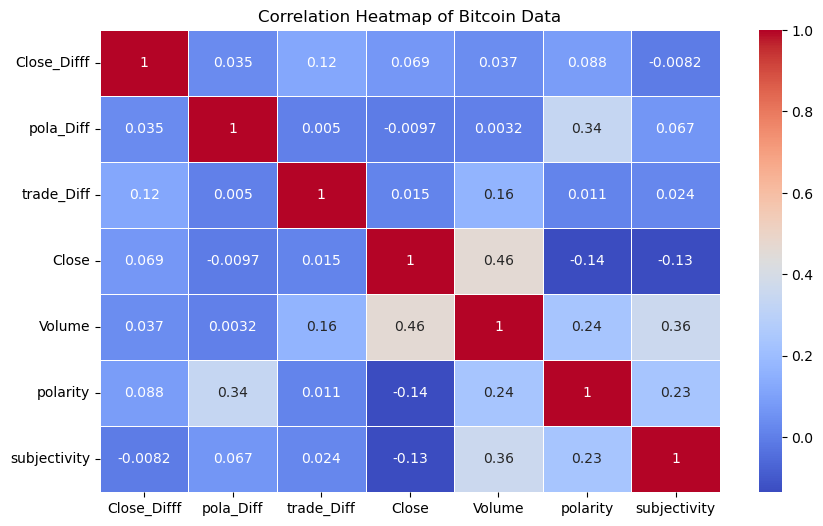

In [12]:
numeric_df = df[['Close_Difff','pola_Diff', 'trade_Diff','Close','Volume','polarity','subjectivity']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()